In [1]:
import sys
sys.path.insert(0, 'lib') # use modified library

import random
import string
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import lib.utils as utils
from lib.image import ColorCaptcha
from lib.image import SUTDCaptcha
from lib.image import BWCaptcha
from lib.image import draw_rect

7gTnQt [[5, 18, 23, 56], [27, 18, 45, 57], [51, 18, 71, 56], [80, 22, 96, 52], [95, 15, 117, 59], [127, 20, 140, 54]]


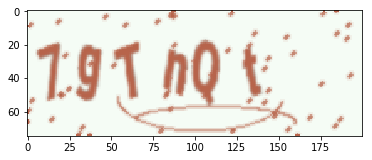

(75, 200)


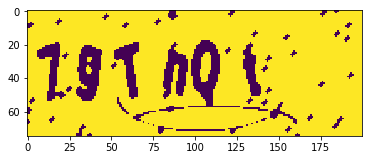

In [73]:
# Color test
characters = string.digits + string.ascii_uppercase + string.ascii_lowercase
n_class = len(characters)
col_generator = ColorCaptcha(width=200, height=75, curve=True, dots=True)

n_len = random.randint(4,7)
random_str = ''.join([random.choice(characters) for j in range(n_len)])
img, boxes = col_generator.generate_image(random_str, bbox=True)

print(random_str, boxes)
#draw_rect(img,boxes)

plt.imshow(img)
plt.show()

img = utils.PIL_to_array(img)
img = utils.threshold(img)
print(img.shape)
plt.imshow(img)

BREAKERS [[2, 19, 27, 57], [22, 19, 45, 55], [39, 18, 63, 56], [60, 16, 89, 54], [86, 14, 114, 54], [110, 12, 134, 50], [129, 11, 154, 49], [151, 10, 174, 46]]


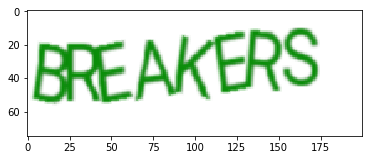

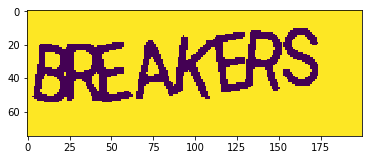

In [46]:
# SUTD test
characters = string.digits + string.ascii_lowercase
n_class = len(characters)
sutd_generator = SUTDCaptcha(width=200, height=75)

n_len = 6

random_str = ''.join([random.choice(characters) for j in range(n_len)])
random_str = 'BREAKERS'
img, boxes = sutd_generator.generate_image(random_str, bbox=True)

print(random_str, boxes)
#draw_rect(img,boxes)

plt.imshow(img)
plt.show()

img = utils.PIL_to_array(img)
plt.imshow(utils.threshold(img))


zero [[12, 24, 35, 51], [36, 22, 65, 52], [79, 20, 112, 54], [110, 23, 136, 52]]


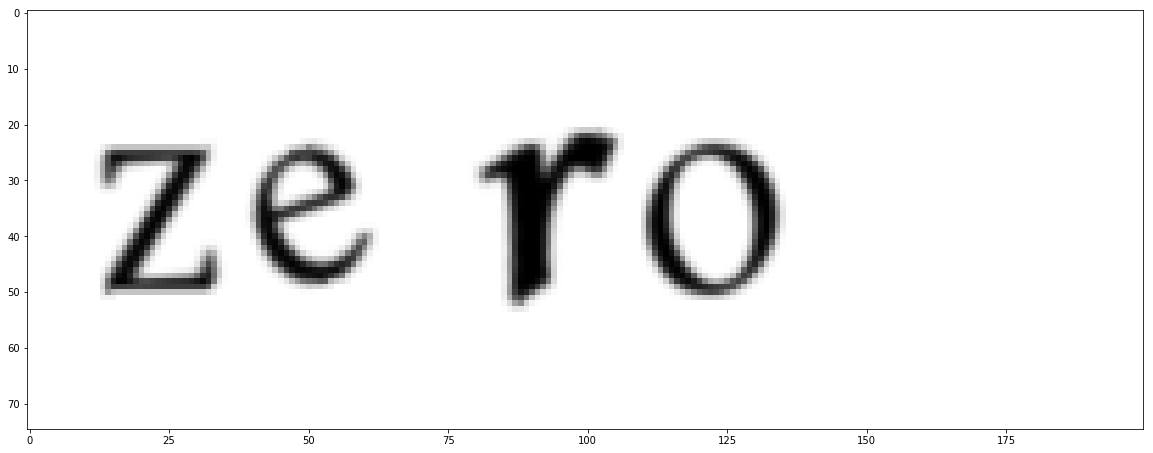

In [47]:
# BW test
characters = string.digits + string.ascii_uppercase
n_class = len(characters)
bw_generator = BWCaptcha(width=200, height=75, scale_factor=1)
n_len = 4

random_str = ''.join([random.choice(characters) for j in range(n_len)])
random_str = 'zero'
img, boxes = bw_generator.generate_image(random_str, bbox=True)

print(random_str, boxes)
#draw_rect(img,boxes)

# img = utils.PIL_to_array(img)
# img = utils.threshold(img)
fig = plt.figure(figsize=(20,10))
plt.imshow(img)

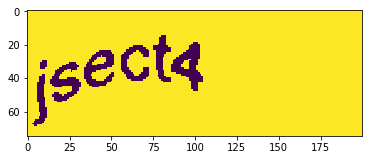

In [40]:
import cv2, os, random
addr = '/home/joel/Desktop/sutd_samples/'
file = addr + random.choice(os.listdir(addr))
img = cv2.imread(file)
img = utils.threshold(img)
plt.imshow(img)

In [6]:
np.where(img==0)

(array([20, 20, 20, ..., 68, 68, 68]),
 array([ 38,  39,  40, ...,  87, 105, 106]))

In [7]:
import pandas as pd
df = pd.read_csv('32k.csv')

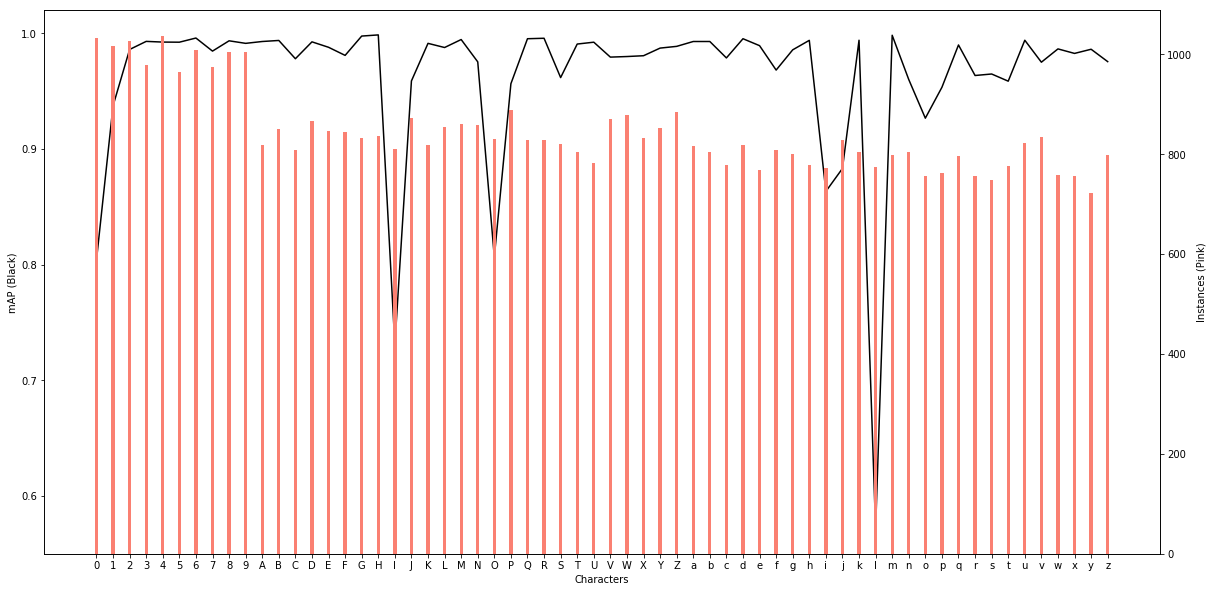

In [24]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()
ax1.plot(df['class'], df['map'], color='black')
ax2.bar(df['class'], df['instances'], color='salmon', width=0.2)
ax1.set_xlabel('Characters')
ax1.set_ylabel('mAP (Black)')
ax2.set_ylabel('Instances (Pink)')
fig1 = plt.gcf()
plt.draw()
fig1.savefig('results.png', dpi=100)
plt.show()